<a href="https://colab.research.google.com/github/datawiz1984/pyhton_note_books/blob/master/malaria_dataset_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Download data from the website of US national library of medicine
import os
import zipfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://ceb.nlm.nih.gov/proj/malaria/"
DOWNLOAD_PATH = "datasets/malaria"
MALARIA_URL = DOWNLOAD_ROOT + "cell_images.zip"

def fetch_housing_data(malaria_url=MALARIA_URL, malaria_path=DOWNLOAD_PATH):
  if not os.path.isdir(malaria_path):
    os.makedirs(malaria_path)
  zip_path = os.path.join(malaria_path, "cell_images.zip")
  print('Retreiving File....')
  urllib.request.urlretrieve(malaria_url, zip_path)
  print('Unzipping file....')
  malaria_zip = zipfile.ZipFile(zip_path)
  malaria_zip.extractall(malaria_path)
  malaria_zip.close()
  print('Done!!!')

In [23]:
fetch_housing_data()

Retreiving File....
Unzipping file....
Done!!!


In [27]:
#Diectory with our training parasitized cells pictures
train_parasitized_dir = os.path.join(DOWNLOAD_PATH, "cell_images/Parasitized")

#Diectory with our training Uninfected cells pictures
train_uninfected_dir = os.path.join(DOWNLOAD_PATH, "cell_images/Uninfected")

train_parasitized_names = os.listdir(train_parasitized_dir)
print(train_parasitized_names[:10])

train_uninfected_names = os.listdir(train_uninfected_dir)
print(train_uninfected_names[:10])

print('total training parasitized images:', len(os.listdir(train_parasitized_dir)))
print('total training Uninfected images:', len(os.listdir(train_uninfected_dir)))

['C99P60ThinF_IMG_20150918_141001_cell_135.png', 'C186P147NThinF_IMG_20151203_150132_cell_201.png', 'C101P62ThinF_IMG_20150918_151335_cell_57.png', 'C80P41ThinF_IMG_20150817_111246_cell_136.png', 'C182P143NThinF_IMG_20151201_172257_cell_165.png', 'C39P4thinF_original_IMG_20150622_105102_cell_93.png', 'C157P118ThinF_IMG_20151115_164141_cell_205.png', 'C66P27N_ThinF_IMG_20150818_164008_cell_161.png', 'C91P52ThinF_IMG_20150821_125423_cell_15.png', 'C80P41ThinF_IMG_20150817_111121_cell_152.png']
['C50P11thinF_IMG_20150724_120553_cell_24.png', 'C139P100ThinF_IMG_20151005_182527_cell_93.png', 'C111P72ThinF_IMG_20150930_113003_cell_125.png', 'C98P59ThinF_IMG_20150917_153938_cell_100.png', 'C165P126ThinF_IMG_20151117_172356_cell_37.png', 'C56P17thinF_IMG_20150728_160438_cell_29.png', 'C56P17thinF_IMG_20150728_153328_cell_36.png', 'C235ThinF_IMG_20151112_164918_cell_251.png', 'C91P52ThinF_IMG_20150821_123314_cell_66.png', 'C58P19thinF_IMG_20150802_122338_cell_54.png']
total training parasitized

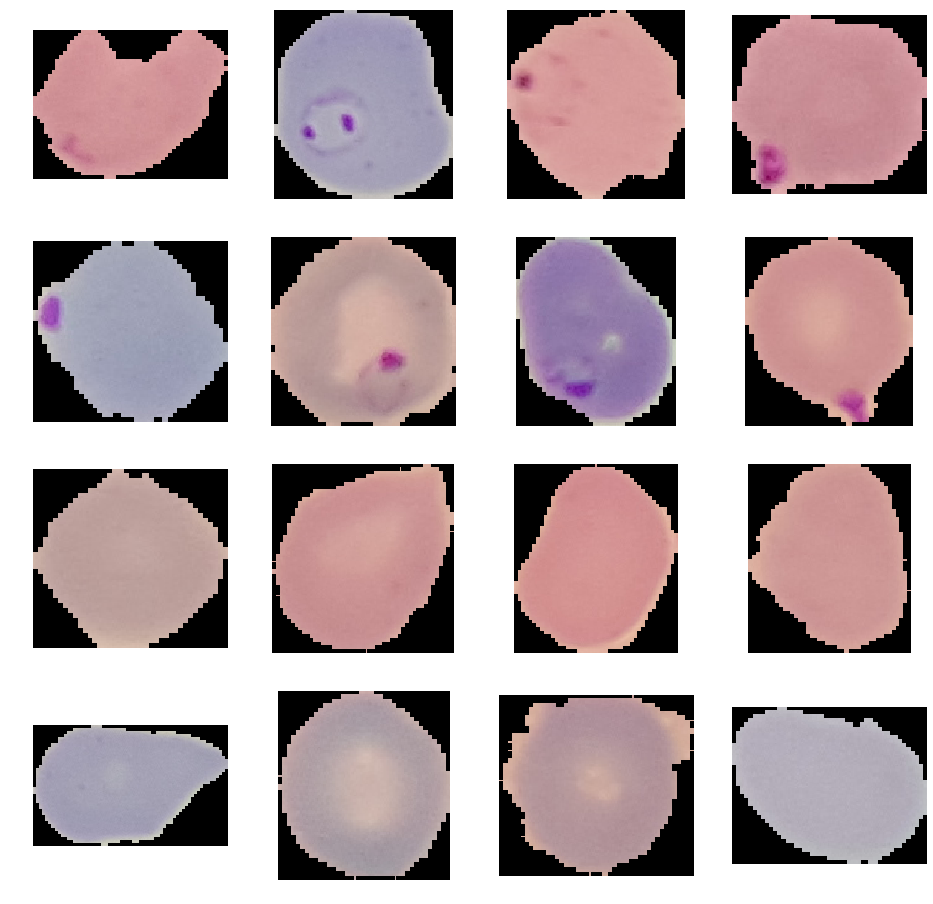

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters for the graphs, output will comprise of 4x4 images

nrows = 4
ncols = 4

#Index for image iteration

pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_parasitized_pix = [os.path.join(train_parasitized_dir, fname) 
                for fname in train_parasitized_names[pic_index-8:pic_index]]
next_Uninfected_pix = [os.path.join(train_uninfected_dir, fname) 
                for fname in train_uninfected_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_parasitized_pix+next_Uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)